### Python for Data Analysis Challenge Exercises

**1. Load the Python Packages and Dataset**

- Start by loading the dataset into Pandas and give a quick overview of its structure.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# airbnb_df = pd.read_csv('archive/players_22.csv')
airbnb_df = pd.read_csv('AB_NYC_2019.csv', low_memory=False)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. **Data Exploration**
    - Check the number of rows and columns in the dataset.
    - Identify missing values in the dataset.

In [3]:
airbnb_df.shape


(48895, 16)

In [4]:

airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:

airbnb_df.shape

(48895, 16)

3. **Data Cleaning**
    - Drop rows with missing values in critical columns like `price` and `reviews_per_month`.
    - Remove listings where the price is greater than 1000 to avoid outliers.

In [7]:
airbnb_df = airbnb_df.dropna(subset=['reviews_per_month'])  
airbnb_df = airbnb_df[airbnb_df['price'] <= 1000] 
airbnb_df.shape

(38736, 16)

4. **Analyze and Answer Key Questions** Answer the following questions:
    - What is the average price of listings in each **neighborhood group**?
    - What are the **top 5 neighborhoods** with the most listings?
    - What is the relationship between the number of **reviews per month** and **price**?
    - What is the distribution of **room types**?

4.1 What is the average price of listings in each **neighborhood group**?

In [8]:
neighborhood_avg_price = airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
neighborhood_avg_price

,neighbourhood_group,price
0,Manhattan,170.017279
1,Brooklyn,117.405809
2,Queens,92.421882
3,Staten Island,89.964968
4,Bronx,79.553653


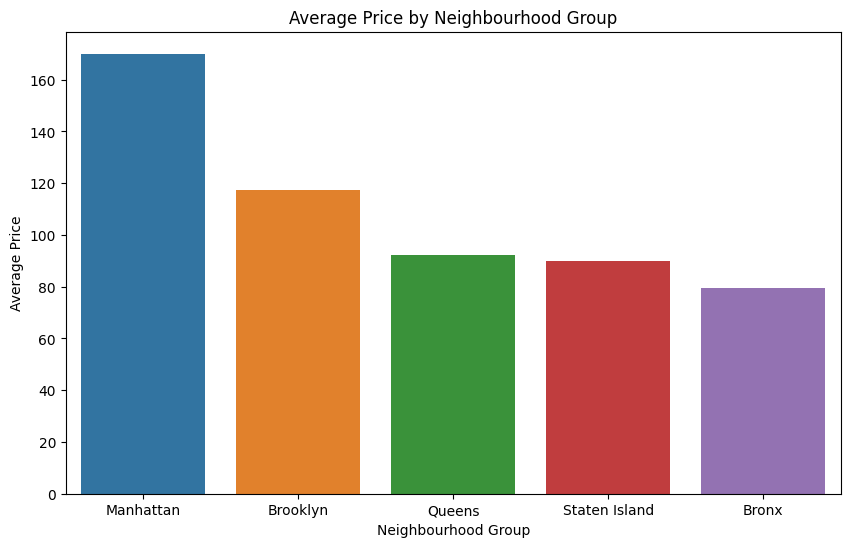

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(neighborhood_avg_price, x='neighbourhood_group', y='price', hue='neighbourhood_group')
plt.title('Average Price by Neighbourhood Group')   
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

4.2 What are the **top 5 neighborhoods** with the most listings?

In [9]:
top_5_neighborhoods = airbnb_df.groupby('neighbourhood')['id'].count().reset_index().sort_values(by='id', ascending=False).head(5)
top_5_neighborhoods.columns = ['neighbourhood', 'count']
top_5_neighborhoods

,neighbourhood,count
212,Williamsburg,3161
13,Bedford-Stuyvesant,3136
93,Harlem,2203
28,Bushwick,1943
94,Hell's Kitchen,1530


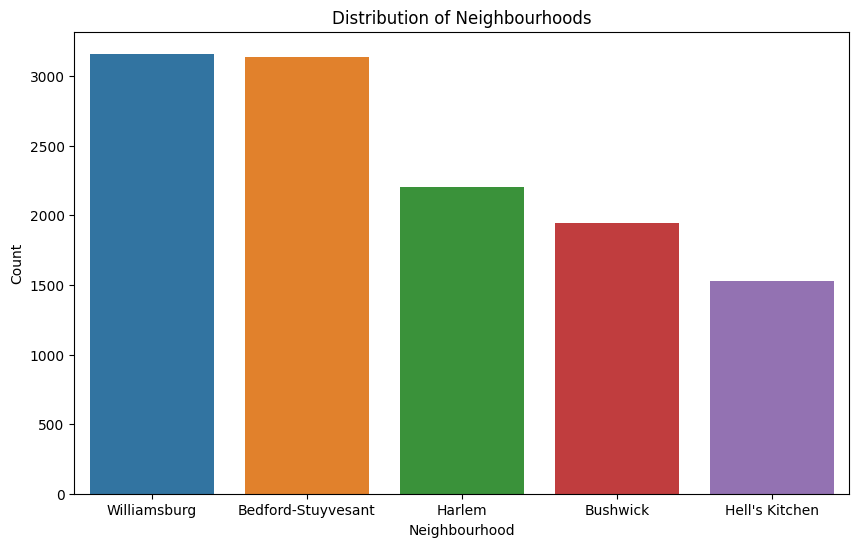

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(top_5_neighborhoods, x='neighbourhood', y='count', hue='neighbourhood')
plt.title('Distribution of Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.show()

4.3 What is the relationship between the number of **reviews per month** and **price**?

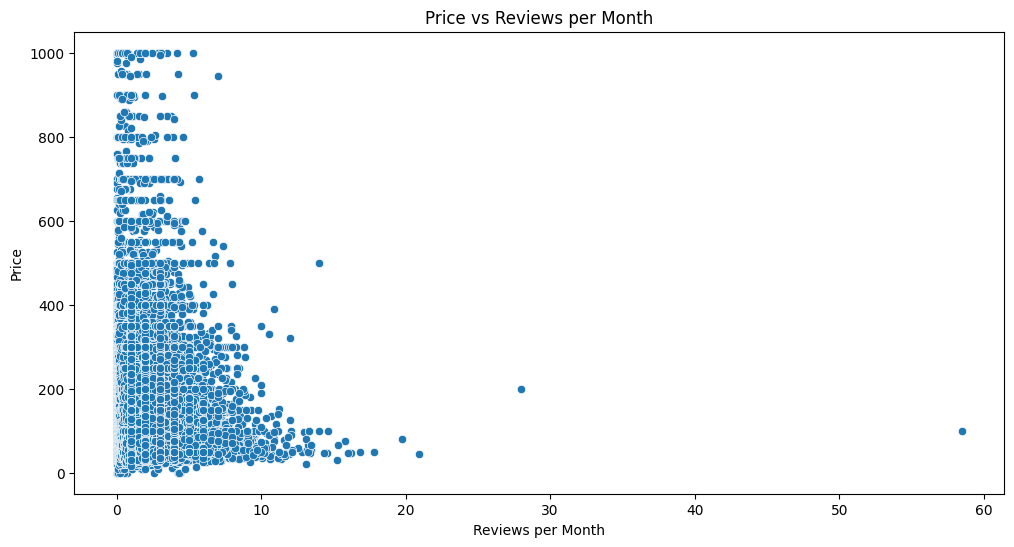

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=airbnb_df)
plt.title('Price vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price') 
plt.show()

4.4 What is the distribution of **room types**?

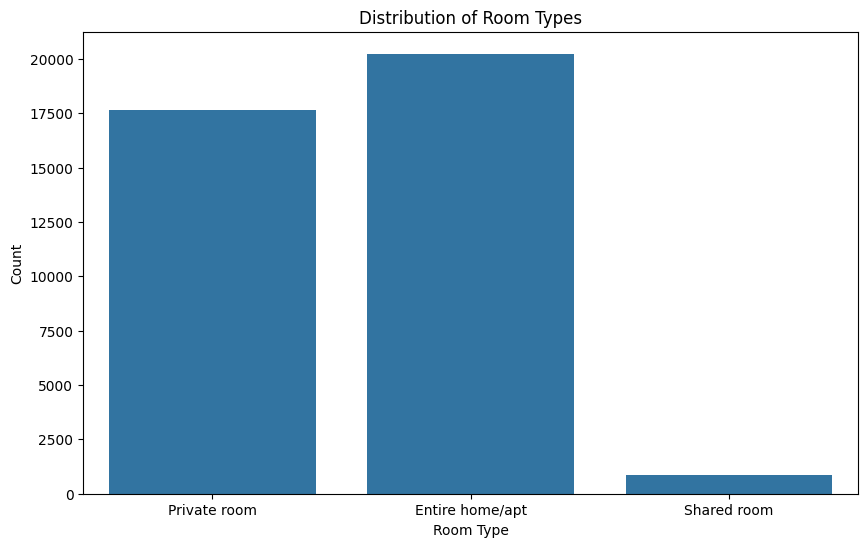

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(airbnb_df, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()